1. blastp
2. filter(len>80%)
3. count
4. draw

In [9]:
import pandas as pd

OUTPATH = "data/compare/similar"

In [10]:
# ! makeblastdb -in data/DMs/p450/consensus.fasta -dbtype prot

In [11]:
# ! blastp -query data/others/generate/1.fasta -db data/DMs/p450/consensus.fasta -out data/similar/p450diffusion.tsv -num_threads 40 -outfmt "6 qseqid sseqid pident" -max_target_seqs 1

In [12]:
# ! blastp -query data/DMs/fine-tune/merged.fasta -db data/DMs/p450/consensus.fasta -out data/similar/p450diff2.tsv -num_threads 40 -outfmt "6 qseqid sseqid pident" -max_target_seqs 1

In [13]:
dfP450Diff = pd.read_csv(
    f"{OUTPATH}/p450diffusion.tsv",
    sep="\t",
    header=None,
    names=[
        "qseqid",
        "sseqid",
        "pident",
        "length",
        "mismatch",
        "gapopen",
        "qstart",
        "qend",
        "sstart",
        "send",
        "evalue",
        "bitscore",
    ],
)
dfP450Diff2 = pd.read_csv(
    f"{OUTPATH}/p450diff2.tsv",
    sep="\t",
    header=None,
    names=[
        "qseqid",
        "sseqid",
        "pident",
        "length",
        "mismatch",
        "gapopen",
        "qstart",
        "qend",
        "sstart",
        "send",
        "evalue",
        "bitscore",
    ],
)

In [14]:
# 添加一个表示来源的列
dfP450Diff["source"] = "P450Diffusion"
dfP450Diff2["source"] = "P450Diff2"

# 合并两个 DataFrame
df_combined = pd.concat([dfP450Diff, dfP450Diff2])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

/tmp/ipykernel_492643/1216086652.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


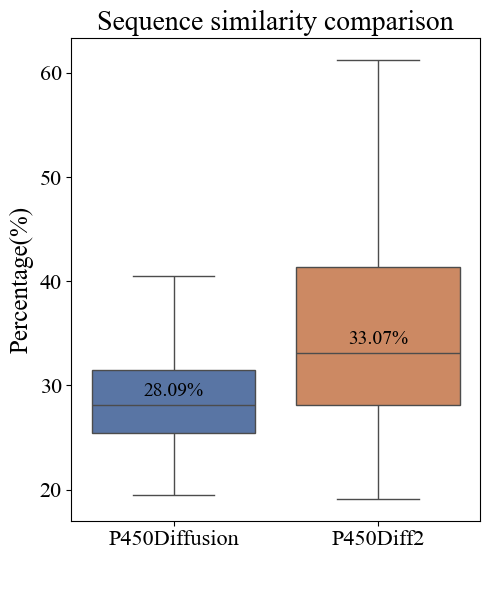

In [16]:
# 自定义调色板
custom_palette = {
    "P450Diffusion": "#4C72B0",  # 蓝色
    "P450Diff2": "#DD8452",  # 橙色
}

FONT_PATH = "data/font/Times New Roman.ttf"
font_prop = font_manager.FontProperties(fname=FONT_PATH)


# 设置画布
plt.figure(figsize=(5, 6))

# 绘制箱线图，指定 hue 为 source 来避免 warning
ax = sns.boxplot(
    x="source", y="pident", data=df_combined, showfliers=False, palette=custom_palette
)

# 获取实际的 x 轴标签顺序
xtick_labels = [t.get_text() for t in ax.get_xticklabels()]

# 根据绘图顺序来标中位数
for i, label in enumerate(xtick_labels):
    median_val = df_combined[df_combined["source"] == label]["pident"].median()
    ax.text(
        i,
        median_val + 0.5,
        f"{median_val:.2f}%",
        ha="center",
        va="bottom",
        fontsize=14,
        color="black",
        fontproperties=font_prop,
    )

# 图形美化
plt.title("Sequence similarity comparison", fontproperties=font_prop, fontsize=20)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)
plt.ylabel("Percentage(%)", fontproperties=font_prop, fontsize=18)
plt.xlabel(" ", fontproperties=font_prop, fontsize=18)
plt.tight_layout()
plt.savefig("data/pic/sequence_similar_distribution.png", dpi=300)
plt.show()